In [1]:
import pandas as pd

In [2]:
# считаем описание данных
df = pd.read_csv('02_otp_desc.csv', sep=';').loc[:,'ПОЛЕ':'ОПИСАНИЕ']

In [3]:
df

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,TARGET,целевая переменная:отклик на маркетинговую кам...
2,AGE,возраст клиента
3,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
4,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
5,GENDER,пол клиента
6,CHILD_TOTAL,количество детей клиента
7,DEPENDANTS,количество иждивенцев клиента
8,EDUCATION,образование
9,MARITAL_STATUS,семейное положение


In [4]:
# считаем все-все данные

In [5]:
train = pd.read_csv('02_otp_train.csv', sep=';')

In [6]:
train.shape

(15223, 52)

In [7]:
test = pd.read_csv('02_otp_test.csv', sep=';')

In [8]:
test.shape

(14910, 51)

In [9]:
# отделим таргет от TRAIN-а

In [10]:
y = train['TARGET']

In [11]:
train = train.drop('TARGET', axis=1)

In [12]:
# соеденим train и test

In [13]:
all_data = pd.concat([train, test])

In [14]:
# необходимо удалить индекс, 
# у нас есть 0-строка в train и 0-строка в test (и так далее 1,2,3,4)
# если мы просто объеденим - у нас сохранятся индексы
# мы же просто уберем индекс и автоматически создастся новый индекс, сквозной и уникальный
all_data = all_data.reset_index(drop=True)

In [15]:
# посмотрим типы данных и их заполняемость
all_data

,AGREEMENT_RK,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,49,1,0,1,2,1,Среднее специальное,Состою в браке,Торговля,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,32,1,0,1,3,3,Среднее,Состою в браке,Торговля,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,52,1,0,1,4,0,Неполное среднее,Состою в браке,Информационные технологии,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,39,1,0,1,1,1,Высшее,Состою в браке,Образование,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,30,1,0,0,0,0,Среднее,Состою в браке,Государственная служба,...,0,1,2,1,16,2,1,"1152,15",2230,NaN
5,59911784,29,1,0,0,0,0,Среднее,Гражданский брак,Торговля,...,0,1,2,1,11,0,0,0,0,NaN
6,59911832,35,1,0,0,1,1,Высшее,Разведен(а),Другие сферы,...,0,1,2,2,14,0,0,0,0,NaN
7,59912034,41,1,0,1,0,0,Среднее,Состою в браке,Сельское хозяйство,...,1,1,2,1,11,0,0,0,0,NaN
8,59912560,53,1,0,0,2,0,Высшее,Состою в браке,Здравоохранение,...,0,1,1,1,3,0,0,0,0,NaN
9,59912659,43,1,0,1,0,0,Среднее специальное,Состою в браке,Образование,...,0,1,1,1,6,0,0,0,0,NaN


In [16]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_P

In [17]:
# Видим, что часть данных - object, скорее всего стоки.
# Давайте выведем эти значения для каждого столбца

In [18]:
for i in all_data.columns: # перебираем все столбцы
    if str(all_data[i].dtype) == 'object': # если тип столбца - object
        print(i) # выводим название столбца
        print(set(all_data[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print() # выводим пустую строку

EDUCATION
{'Два и более высших образования', 'Среднее специальное', 'Неоконченное высшее', 'Ученая степень', 'Неполное среднее', 'Высшее', 'Среднее'}

MARITAL_STATUS
{'Не состоял в браке', 'Разведен(а)', 'Гражданский брак', 'Состою в браке', 'Вдовец/Вдова'}

GEN_INDUSTRY
{nan, 'Другие сферы', 'Энергетика', 'Подбор персонала', 'Сборочные производства', 'Туризм', 'ЧОП/Детективная д-ть', 'Торговля', 'Нефтегазовая промышленность', 'Развлечения/Искусство', 'Образование', 'Коммунальное хоз-во/Дорожные службы', 'Металлургия/Промышленность/Машиностроение', 'Химия/Парфюмерия/Фармацевтика', 'Салоны красоты и здоровья', 'Государственная служба', 'Логистика', 'Юридические услуги/нотариальные услуги', 'Управляющая компания', 'Информационные технологии', 'СМИ/Реклама/PR-агенства', 'Строительство', 'Здравоохранение', 'Маркетинг', 'Страхование', 'Ресторанный бизнес/Общественное питание', 'Сельское хозяйство', 'Недвижимость', 'Информационные услуги', 'Банк/Финансы', 'Транспорт', 'Наука'}

GEN_TITLE
{na

In [19]:
# можно заметить что некоторые переменные, 
# которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа,
# но по какой-то (ниже увидим) причине были распознаны как строки

In [20]:
all_data['PERSONAL_INCOME'] = all_data['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [21]:
# причина же что использовалась запятая для разделения не целой части числа

In [22]:
all_data['CREDIT'] = all_data['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['FST_PAYMENT'] = all_data['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_AVG_DLQ_AMT'] = all_data['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_MAX_DLQ_AMT'] = all_data['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

In [23]:
# запускаем повторно код и смотрим, какие столбцы с какими строковыми значениями остались
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_

In [24]:
for i in all_data.columns:
    if str(all_data[i].dtype) == 'object':
        print(i)
        print(set(all_data[i]))
        print()

EDUCATION
{'Два и более высших образования', 'Среднее специальное', 'Неоконченное высшее', 'Ученая степень', 'Неполное среднее', 'Высшее', 'Среднее'}

MARITAL_STATUS
{'Не состоял в браке', 'Разведен(а)', 'Гражданский брак', 'Состою в браке', 'Вдовец/Вдова'}

GEN_INDUSTRY
{nan, 'Другие сферы', 'Энергетика', 'Подбор персонала', 'Сборочные производства', 'Туризм', 'ЧОП/Детективная д-ть', 'Торговля', 'Нефтегазовая промышленность', 'Развлечения/Искусство', 'Образование', 'Коммунальное хоз-во/Дорожные службы', 'Металлургия/Промышленность/Машиностроение', 'Химия/Парфюмерия/Фармацевтика', 'Салоны красоты и здоровья', 'Государственная служба', 'Логистика', 'Юридические услуги/нотариальные услуги', 'Управляющая компания', 'Информационные технологии', 'СМИ/Реклама/PR-агенства', 'Строительство', 'Здравоохранение', 'Маркетинг', 'Страхование', 'Ресторанный бизнес/Общественное питание', 'Сельское хозяйство', 'Недвижимость', 'Информационные услуги', 'Банк/Финансы', 'Транспорт', 'Наука'}

GEN_TITLE
{na

# Данные готовы, теперь вам предлагается начать решать задачу

In [25]:
# Есть ли пропуски в данных? что с ними сделать?
# Пропуски есть, для каждой числовой переменной варианты:
# 1) Убрать переменную с существенным процентом пропусков
# 2) Заполнить средним значением или медианой (по ситуации)
# 3) Заполнить нулем 0


# Ваш код :-)
# Вариант 3 для переменных WORK_TIME и PREVIOUS_CARD_NUM_UTILIZED подошел больше 
# all_data = all_data.drop(['WORK_TIME'], axis=1)
# all_data.WORK_TIME[all_data.WORK_TIME.isnull()] = all_data.WORK_TIME.median()
all_data.WORK_TIME[all_data.WORK_TIME.isnull()] = 0
all_data.PREVIOUS_CARD_NUM_UTILIZED[all_data.PREVIOUS_CARD_NUM_UTILIZED.isnull()] = 0 # в описании переменной "если пусто - 0"
# Для удучшения показателей исключаем идентификатор объекта в выборке AGREEMENT_RK
all_data = all_data.drop(['AGREEMENT_RK'], axis=1)

C:\Users\Ne0\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Ne0\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [26]:
# Как поступить со строковыми переменными?
# Варианты:
# 1) Каждую строковую переменную разбиваем на несколько битовых переменных по количеству значений в строковой переменной
# 2) Убрать строковые переменные, чтобы исключить влияние на результат

# Ваш код :-)
# Вариант 1 не подошел из-за низких показателей, в том числе из-за не полностью заполненных переменных
# all_data = pd.get_dummies(all_data, columns=['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', \
#                                              'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'REG_ADDRESS_PROVINCE', \
#                                              'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM'])

# Вариант 2 подошел больше
all_data = all_data.drop(['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', \
                          'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'REG_ADDRESS_PROVINCE', \
                          'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM'], axis=1)

In [27]:
# В итоге должны получиться данные без пропусков и только числовые
all_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 37 columns):
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
PERSONAL_INCOME               30133 non-null float64
REG_FACT_FL                   30133 non-null int64
FACT_POST_FL                  30133 non-null int64
REG_POST_FL                   30133 non-null int64
REG_FACT_POST_FL              30133 non-null int64
REG_FACT_POST_TP_FL           30133 non-null int64
FL_PRESENCE_FL                30133 non-null int64
OWN_AUTO                      30133 non-null int64
AUTO_RUS_FL                   30133 non-null int64
HS_PRESENCE_FL                30133 non-null int64
COT_PRESENCE_FL               30133 non-null int64
GAR_PRESENCE_FL       

In [28]:
# Вновь разделите на train и test (не мешая)

# Ваш код :-)
train = all_data.iloc[:15223]
train.shape

(15223, 37)

In [29]:
test = all_data.iloc[-14910:]
test.shape

(14910, 37)

In [30]:
# Сделать hold-out sampling на train выборке
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
# test_size=0.3, random_state=42

# Ваш код :-)
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3, random_state=42)

In [31]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Ваш код :-)
# dtc - DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
dtc_predict = dtc.predict(X_test)
dtc_predict_proba = dtc.predict_proba(X_test)
# rfc - RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)
rfc_predict_proba = rfc.predict_proba(X_test)
# lr - LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_predict_proba = lr.predict_proba(X_test)

In [32]:
# Посчитать метрики стандартные
# accuracy, precision, recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Ваш код :-)
# dtc - DecisionTreeClassifier
print('dtc_accuracy', accuracy_score(y_test, dtc_predict))
print('dtc_precision', precision_score(y_test, dtc_predict))
print('dtc_recall', recall_score(y_test, dtc_predict))
# rfc - RandomForestClassifier
print('rfc_accuracy', accuracy_score(y_test, rfc_predict))
print('rfc_precision', precision_score(y_test, rfc_predict))
print('rfc_recall', recall_score(y_test, rfc_predict))
# lr - LogisticRegression
print('lr_accuracy', accuracy_score(y_test, lr_predict))
print('lr_precision', precision_score(y_test, lr_predict))
print('lr_recall', recall_score(y_test, lr_predict))

dtc_accuracy 0.791985986424
dtc_precision 0.174629324547
dtc_recall 0.190990990991
rfc_accuracy 0.875848478213
rfc_precision 0.323529411765
rfc_recall 0.0198198198198
lr_accuracy 0.878038099409
lr_precision 0.333333333333
lr_recall 0.0036036036036


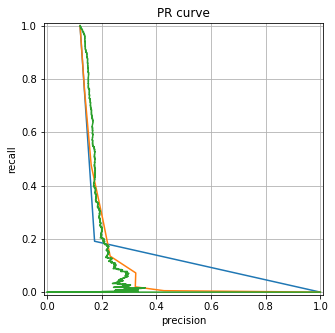

In [33]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

# Ваш код :-)
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(5, 5))
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('PR curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
# dtc - DecisionTreeClassifier
precision, recall, tresholds = precision_recall_curve (y_test, dtc_predict_proba[:,1])
plt.plot(precision, recall)
# rfc - RandomForestClassifier
precision, recall, tresholds = precision_recall_curve (y_test, rfc_predict_proba[:,1])
plt.plot(precision, recall)
# lr - LogisticRegression
precision, recall, tresholds = precision_recall_curve (y_test, lr_predict_proba[:,1])
plt.plot(precision, recall)

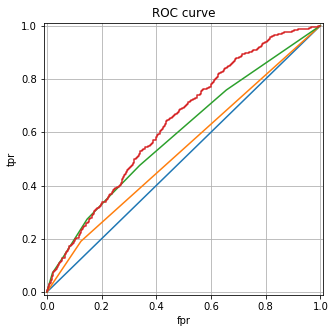

In [34]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

# Ваш код :-)
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(5, 5))
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
# dtc - DecisionTreeClassifier
fpr, tpr, thresholds = roc_curve(y_test, dtc_predict_proba[:,1])
plt.plot(fpr, tpr)
# rfc - RandomForestClassifier
fpr, tpr, thresholds = roc_curve(y_test, rfc_predict_proba[:,1])
plt.plot(fpr, tpr)
# lr - LogisticRegression
fpr, tpr, thresholds = roc_curve(y_test, lr_predict_proba[:,1])
plt.plot(fpr, tpr)

In [35]:
print('dtc_roc_auc_score', roc_auc_score(y_test, dtc_predict_proba[:,1]))
print('rfc_roc_auc_score', roc_auc_score(y_test, rfc_predict_proba[:,1]))
print('lr_roc_auc_score', roc_auc_score(y_test, lr_predict_proba[:,1]))

dtc_roc_auc_score 0.533057808556
rfc_roc_auc_score 0.592218165324
lr_roc_auc_score 0.636191425723


In [36]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

# Ваш код :-)
dtc = DecisionTreeClassifier()
dtc_roc_auc = cross_val_score(
    dtc,
    train,
    y,
    scoring='roc_auc',
    cv=10
)
print ('dtc_roc_auc', dtc_roc_auc.mean())

rfc = RandomForestClassifier()
rfc_roc_auc = cross_val_score(
    rfc,
    train,
    y,
    scoring='roc_auc',
    cv=10
)
print ('rfc_roc_auc', rfc_roc_auc.mean())

lr = LogisticRegression()
lr_roc_auc = cross_val_score(
    lr,
    train,
    y,
    scoring='roc_auc',
    cv=10
)
print ('lr_roc_auc', lr_roc_auc.mean())


C:\Users\Ne0\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


dtc_roc_auc 0.521112718829
rfc_roc_auc 0.609995999455
lr_roc_auc 0.640740217608


In [38]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

# Ваш код :-)
# Лучшая модель lr - LogisticRegression с результатом lr_roc_auc 0.640740217608 - это 10 место в таблице победителей конкурса:
# http://www.machinelearning.ru/wiki/index.php?title=%D0%98%D1%82%D0%BE%D0%B3%D0%B8_%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0
lr.fit(train, y)
lr_predict_proba = lr.predict_proba(test)
lr_predict_proba[:,1]

C:\Users\Ne0\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


array([ 0.11373165,  0.06555535,  0.1602952 , ...,  0.13712887,
        0.0754031 ,  0.17828936])

In [39]:
# Ниже оценивается roc_auc по выполненному для test выборки predict в сравнении с данными TARGET, взятыми по ссылке:
# http://www.machinelearning.ru/wiki/images/6/60/Data_set_validation_target_only.rar 

In [40]:
y_2 = pd.read_csv('data set validation_target_only.csv')
print('lr_roc_auc_score', roc_auc_score(y_2, lr_predict_proba[:,1]))

lr_roc_auc_score 0.643123968736
